# Named Entity Recognition

## Task 1

In [49]:
import pandas as pd

with open('sample.txt') as f:
    data = f.readlines()

df = pd.DataFrame(data, columns=['articles'])
df.head()

,articles
0,@fansoniclove Gold the Tenrec\n
1,Tokyo-bound Sampson sets Aust rifle record. Sh...
2,Originally posted by cordingup ↑ I see very in...
3,"""US 500 Futures Discussions. Hey guys what is ..."
4,"Good time to invest in gold?""\n"


In [50]:
print("No. of articles: ", len(df['articles']))
print(df['articles'][1])

No. of articles:  1870
Tokyo-bound Sampson sets Aust rifle record. Shooter Dane Sampson has struck career-best form as he builds towards a third Olympics, setting a national record while winning the 50m rifle event at the South Australia championships. Sampson registered a score of 462 points to claim gold in the three positions event. The performance bettered Sampson's own national record of 460.7 points, which he achieved at last month's Wingfield grand prix. The score was also notably higher than what Italy's Niccolo Campriani (458.8) and Poland's Tomasz Bartnik (460.4) produced to win gold at the 2016 Olympics and 2018 world championships respectively. "It's good to be shooting PBs at this stage. It was a world-class finals score," Sampson said, having previously competed at the 2012 and 2016 Olympics. "You are unlikely to lose many competitions with that score. "I definitely feel that I am getting better and better and I am tracking well for Tokyo." Sampson and other members of Au

## Task 2

In [51]:
import matplotlib.pyplot as plt 

In [52]:
GOLD = 'gold'
SILVER = 'silver'

def contains_gold_silver(article):
    if GOLD in article:
        return GOLD, True
    
    if SILVER in article:
        return SILVER, True
    
    return None, False

In [54]:
df['articles'] = df['articles'].str.lower()
df = df.assign(gold = False)
df = df.assign(silver = False)
counts = {GOLD: 0, SILVER: 0}

for ind, article in enumerate(df['articles']):
    obj, present = contains_gold_silver(article)

    if present:
        if obj == GOLD:
            counts[GOLD] += 1
            df.at[ind, GOLD] = True
        else:
            counts[SILVER] += 1
            df.at[ind, SILVER] = True

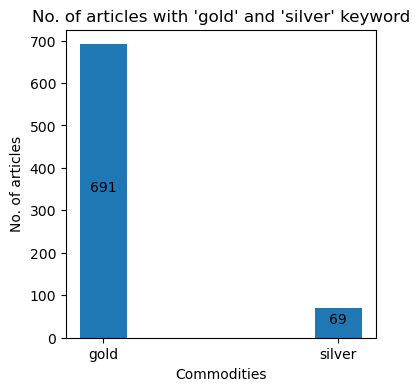

In [71]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

objs = list(counts.keys())
freq = list(counts.values())

fig = plt.figure(figsize=(4, 4))
plt.bar(objs, freq, width=0.2)
addlabels(objs, freq)

plt.xlabel("Commodities")
plt.ylabel("No. of articles")
plt.title("No. of articles with \'gold\' and \'silver\' keyword")
plt.show()

In [82]:
all_gold = df[df['gold'] == True]
all_silver = df[df['silver'] == True]
for a in all_silver['articles'][:10]:
    print(a)

every post and comment you have ever made was related to persuading people to buy silver.

originally posted by kervio: ↑ i think the update said median age of the first set of patients was around mid 50s and median age of the later set of patients was around 69, so they would have only had to have put the inclusion criteria in half way through the trial when the evidence was emerging that age was a huge factor in deaths in order to have a successful trial. this is the big "what if" that might have sent the sp to $10, fda approval, lives saved etc.we can give them a pass on not knowing that up front for sure because of the speed in which the trial moved forwards on, but i think some reactivity would have saved the day here once more was known about covid (in the same way that we found out about comorbidities leading to higher rates of death).i disagree with this: "this disease has been totally wacky in respect of different age cohorts, and no one has or has had any idea what is going t

In [83]:
for a in all_gold['articles'][:10]:
    print(a)

@fansoniclove gold the tenrec

tokyo-bound sampson sets aust rifle record. shooter dane sampson has struck career-best form as he builds towards a third olympics, setting a national record while winning the 50m rifle event at the south australia championships. sampson registered a score of 462 points to claim gold in the three positions event. the performance bettered sampson's own national record of 460.7 points, which he achieved at last month's wingfield grand prix. the score was also notably higher than what italy's niccolo campriani (458.8) and poland's tomasz bartnik (460.4) produced to win gold at the 2016 olympics and 2018 world championships respectively. "it's good to be shooting pbs at this stage. it was a world-class finals score," sampson said, having previously competed at the 2012 and 2016 olympics. "you are unlikely to lose many competitions with that score. "i definitely feel that i am getting better and better and i am tracking well for tokyo." sampson and other membe

- no context considered, proper nouns have keyword, not semantic matches

## Task 3